In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid data/data/Constraint_Train.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid data/data/Constraint_Val.csv')
train=data
test=df


Mounted at /content/drive


In [3]:
data['tweet'] = data['tweet'].apply(lambda x: x.lower())
df['tweet'] = df['tweet'].apply(lambda x: x.lower())
data.head()

,id,tweet,label
0,1,the cdc currently reports 99031 deaths. in gen...,real
1,2,states reported 1121 deaths a small rise from ...,real
2,3,politically correct woman (almost) uses pandem...,fake
3,4,#indiafightscorona: we have 1524 #covid testin...,real
4,5,populous states can generate large case counts...,real


In [4]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['tweet'] = data['tweet'].apply(punctuation_removal)
df['tweet'] = df['tweet'].apply(punctuation_removal)

In [5]:
data.head()

,id,tweet,label
0,1,the cdc currently reports 99031 deaths in gene...,real
1,2,states reported 1121 deaths a small rise from ...,real
2,3,politically correct woman almost uses pandemic...,fake
3,4,indiafightscorona we have 1524 covid testing l...,real
4,5,populous states can generate large case counts...,real


In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['tweet'] = data['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
data.head()

,id,tweet,label
0,1,cdc currently reports 99031 deaths general dis...,real
1,2,states reported 1121 deaths small rise last tu...,real
2,3,politically correct woman almost uses pandemic...,fake
3,4,indiafightscorona 1524 covid testing laborator...,real
4,5,populous states generate large case counts loo...,real


label
fake    3060
real    3360
Name: tweet, dtype: int64


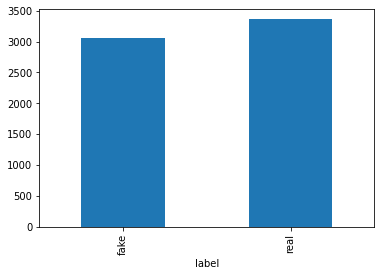

In [8]:
print(data.groupby(['label'])['tweet'].count())
data.groupby(['label'])['tweet'].count().plot(kind="bar")
plt.show()

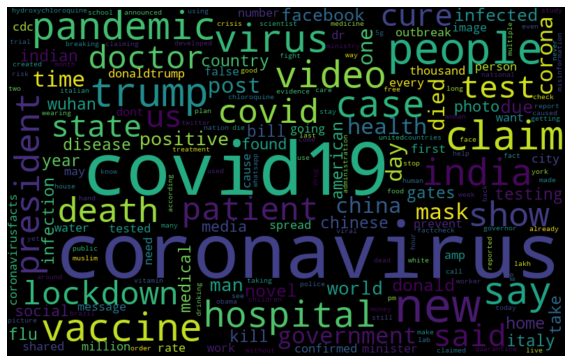

In [9]:
from wordcloud import WordCloud

fake_data = data[data["label"] == "fake"]
all_words = ' '.join([tweet for tweet in fake_data.tweet])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

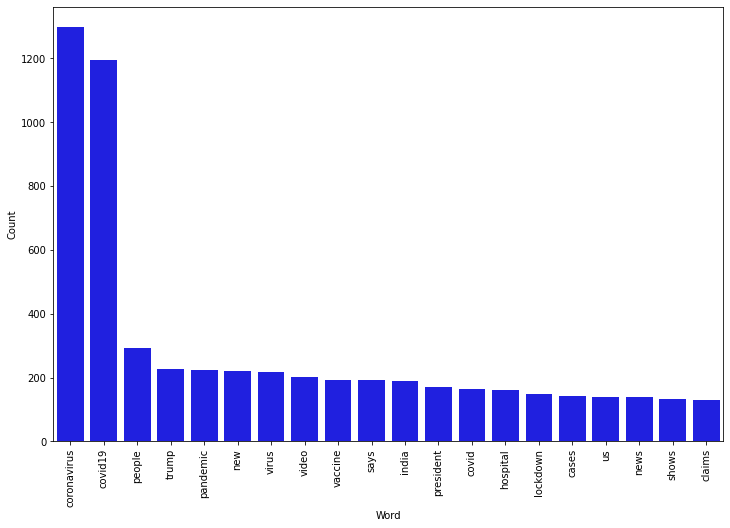

In [12]:
counter(data[data["label"] == "fake"], "tweet", 20)


In [13]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#X_train,X_test,y_train,y_test = train_test_split(data['tweet'], data.label, test_size=0.2, random_state=42)
fn=re

NameError: ignored

In [14]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(data.tweet, data.label)
print(model.classes_)
model1=model.predict_proba(data.tweet)

model1_test=model.predict_proba(df.tweet)
prediction = model.predict(df.tweet)
print("accuracy: {}%".format(round(accuracy_score(df.label, prediction)*100,2)))


['fake' 'real']
accuracy: 91.21%


In [15]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(data.tweet,data.label)
model2=model.predict_proba(data.tweet)
model2_test=model.predict_proba(df.tweet )

# Accuracy
prediction = model.predict(df.tweet)
print("accuracy: {}%".format(round(accuracy_score(df.label, prediction)*100,2)))

accuracy: 80.56%


In [17]:
import csv
with open("model1.csv","w",encoding='UTF8', newline='') as new_file:
    writer = csv.writer(new_file)
    writer.writerow(["model1_fake","model1_real"])
    for x in model1:
        writer.writerow(x)

In [18]:
import csv
with open("model2.csv","w",encoding='UTF8', newline='') as new_file:
    writer = csv.writer(new_file)
    writer.writerow(["model2_fake","model2_real"])
    for y in model2:
        writer.writerow(y)

In [19]:
import csv
with open("model2test.csv","w",encoding='UTF8', newline='') as new_file:
    writer = csv.writer(new_file)
    writer.writerow(["model1_fake","model1_real"])
    for y in model2_test:
        writer.writerow(y)

In [20]:
import csv
with open("model1test.csv","w",encoding='UTF8', newline='') as new_file:
    writer = csv.writer(new_file)
    writer.writerow(["model2_fake","model2_real"])
    for y in model1_test:
        writer.writerow(y)

In [21]:
pd1 = pd.read_csv("model1.csv")
print(pd1)
pd2 = pd.read_csv("model2.csv")
pd1 = pd1.merge(pd2,how='outer',left_index=True,right_index=True)
#pd1.merge(data['label'],left_index=True,right_index=True)
pd1.to_csv('model_train.csv', index=False)

#model_prob=train.merge(pd1,how='outer',left_index=True,right_index=True)
#model_prob.to_csv('model_prob.csv', index=False)
#model_prob.head()


      model1_fake  model1_real
0        0.286892     0.713108
1        0.093044     0.906956
2        0.857609     0.142391
3        0.098641     0.901359
4        0.116537     0.883463
...           ...          ...
6415     0.574540     0.425460
6416     0.859217     0.140783
6417     0.899255     0.100745
6418     0.695431     0.304569
6419     0.039914     0.960086

[6420 rows x 2 columns]


In [22]:
pd1 = pd.read_csv("model1test.csv")
pd2 = pd.read_csv("model2test.csv")
print(pd1)
pd1 = pd1.merge(pd2,how='outer',left_index=True,right_index=True)

pd1.to_csv('model_test.csv', index=False)

#model_prob_test=test.merge(pd1,how='outer',left_index=True,right_index=True)
#model_prob_test.to_csv('model_probtest.csv', index=False)
#model_prob_test.head()


      model2_fake  model2_real
0        0.884682     0.115318
1        0.252836     0.747164
2        0.843796     0.156204
3        0.847894     0.152106
4        0.425930     0.574070
...           ...          ...
2135     0.170248     0.829752
2136     0.417629     0.582371
2137     0.697603     0.302397
2138     0.471143     0.528857
2139     0.005846     0.994154

[2140 rows x 2 columns]


In [ ]:
cm = metrics.confusion_matrix(data.label,prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

ValueError: ignored

In [ ]:
def output_lable(n):
    if n == 'fake':
        return "Fake News"
    elif n == 'real':
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    #new_def_test["text"] = new_def_test["text"].apply(lambda x: x.lower())
    #new_def_test["text"] = new_def_test["text"].apply(punctuation_removal)
    pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
    prediction = model.predict(new_def_test['text'])

    return print(prediction)

In [ ]:
news = str(input())
manual_testing(news)


In [ ]:
tdf = TfidfVectorizer(stop_words='english',ngram_range=(1,2) )
df=df.head(100)
vectorizer = tdf.fit(df.text)
transformed_text = vectorizer.transform(data.text)
def get_tfidf_term_scores(feature_names):
    '''Returns dictionary with term names and total tfidf scores for all terms in corpus'''
    term_corpus_dict = {}
    # iterate through term index and term 
    for term_ind, term in enumerate(feature_names):
        term_name = feature_names[term_ind]
        term_corpus_dict[term_name] = np.sum(transformed_title.T[term_ind].toarray())
        
    return term_corpus_dict

# list of features created by tfidf
#feature_names = tdf.get_feature_names()

#term_corpus_dict = get_tfidf_term_scores(feature_names)
def get_sorted_tfidf_scores(term_corpus_dict):
     #Returns sort words from highest score to lowest score sort indices from words with highest score to lowest score
    sortedIndices = np.argsort( list(term_corpus_dict.values()))[::-1]
    # move words and score out of dicts and into arrays
    termNames = np.array(list(term_corpus_dict.keys()))
    scores = np.array(list(term_corpus_dict.values()))
    # sort words and scores
    termNames = termNames[sortedIndices]
    scores = scores[sortedIndices]
    return termNames, scores


#termNames, scores = get_sorted_tfidf_scores(term_corpus_dict)
print(tdf.get_feature_names())
print("/n/n/n")
print(tdf.vocabulary_)